### Importar Librerias

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine



### Crear conexcion con la base de datos MySQL

In [25]:
# Credenciales
username = 'root'
password = 'root1234'
host = 'localhost'
dbname = 'acc_vial'

# Crear una conexión a la base de datos
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}/{dbname}')

### Lectura de Datasets

In [26]:
query1 = 'SELECT * FROM hechos_homicidios'
query2 = 'SELECT * FROM victimas_homicidios'
query3 = 'SELECT * FROM hechos_lesiones'
query4 = 'SELECT * FROM victimas_lesiones'

df_hec_hom = pd.read_sql_query(query1, engine)
df_vic_hom = pd.read_sql_query(query2, engine)
df_hec_les = pd.read_sql_query(query3, engine)
df_vic_les = pd.read_sql_query(query4, engine)


In [27]:
df_hec_hom.head()

,ID_HECHO,N_VICTIMAS,FECHA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,LONGITUD,LATITUD,VICTIMA,ACUSADO,DIRECCION
0,2016-0001,1,2016-01-01,04:00:00,av piedra buena y av fernandez de la cruz,avenida,8,-58.4753,-34.6876,moto,auto,None
1,2016-0002,1,2016-01-02,01:15:00,av gral paz y av de los corrales,gral paz,9,-58.5088,-34.6698,auto,pasajeros,None
2,2016-0003,1,2016-01-03,07:00:00,av entre rios 2034,avenida,1,-58.3904,-34.6319,moto,auto,None
3,2016-0004,1,2016-01-10,00:00:00,av larrazabal y gral villegas conrado,avenida,8,-58.4650,-34.6809,moto,sd,None
4,2016-0005,1,2016-01-21,05:20:00,av san juan y presidente luis saenz peña,avenida,1,-58.3872,-34.6225,moto,pasajeros,None


In [28]:
df_vic_hom.head()

,ID_HECHO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,conductor,masculino,19,2016-01-01
1,2016-0002,conductor,masculino,70,2016-01-02
2,2016-0003,conductor,masculino,30,2016-01-03
3,2016-0004,conductor,masculino,18,None
4,2016-0005,conductor,masculino,29,2016-02-01


In [29]:
df_hec_les.head()

,ID_HECHO,N_VICTIMAS,FECHA,HORA,COMUNA,TIPO_CALLE,DIRECCION,LONGITUD,LATITUD,VICTIMA,ACUSADO,GRAVEDAD
0,LC-2019-0000179,1,2019-01-01,09:00:00,14,SD,"Obligado Rafael, Av.Costanera 3300, Barrio: Pa...",-58.4089,-34.5597,CICLISTA,SD,SD
1,LC-2019-0000053,1,2019-01-01,01:55:00,8,SD,"Autopista Presidente Héctor J. Cámpora y Roca,...",-58.4435,-34.6691,AUTO,SD,SD
2,LC-2019-0000063,1,2019-01-01,02:00:00,8,SD,"Barros Pazos, Jose y Larraya 0, Barrio: Villa ...",-58.4683,-34.6776,SD,SD,SD
3,LC-2019-0000079,1,2019-01-01,02:30:00,7,SD,"Torres Y Tenorio, Pres. y Riestra Av. 0, Barri...",-58.4374,-34.6474,PEATON,SD,SD
4,LC-2019-0000082,4,2019-01-01,04:30:00,3,SD,"Corrientes Av. y Uriburu Jose E., Pres. 0, Bar...",-58.3982,-34.6046,AUTO,SD,SD


In [30]:
df_vic_les.head()

,ID_HECHO,SEXO,EDAD,GRAVEDAD
0,LC-2019-0000053,varon,57,sd
1,LC-2019-0000063,sd,SD,sd
2,LC-2019-0000079,varon,SD,sd
3,LC-2019-0000082,varon,45,sd
4,LC-2019-0000082,mujer,45,sd


In [31]:
# Configuracion de visualizaciones

%matplotlib inline
sns.set(style="whitegrid")

### Revision de tipos de dato de cada dataset

In [32]:
print(df_hec_hom.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_HECHO         684 non-null    object 
 1   N_VICTIMAS       684 non-null    int64  
 2   FECHA            684 non-null    object 
 3   HORA             684 non-null    object 
 4   LUGAR_DEL_HECHO  684 non-null    object 
 5   TIPO_DE_CALLE    684 non-null    object 
 6   COMUNA           684 non-null    object 
 7   LONGITUD         684 non-null    float64
 8   LATITUD          684 non-null    float64
 9   VICTIMA          684 non-null    object 
 10  ACUSADO          684 non-null    object 
 11  DIRECCION        0 non-null      object 
dtypes: float64(2), int64(1), object(9)
memory usage: 64.3+ KB
None


In [33]:
# Columna LUGAR_DEL_HECHO fue suprimida dentro del modelo de POWER BI

In [34]:
print(df_vic_hom.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_HECHO             717 non-null    object
 1   ROL                  717 non-null    object
 2   SEXO                 717 non-null    object
 3   EDAD                 717 non-null    object
 4   FECHA_FALLECIMIENTO  649 non-null    object
dtypes: object(5)
memory usage: 28.1+ KB
None


In [35]:
print(df_hec_les.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22576 entries, 0 to 22575
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID_HECHO    22576 non-null  object 
 1   N_VICTIMAS  22576 non-null  int64  
 2   FECHA       22576 non-null  object 
 3   HORA        22576 non-null  object 
 4   COMUNA      22407 non-null  object 
 5   TIPO_CALLE  22576 non-null  object 
 6   DIRECCION   22576 non-null  object 
 7   LONGITUD    22314 non-null  float64
 8   LATITUD     22314 non-null  float64
 9   VICTIMA     22576 non-null  object 
 10  ACUSADO     22576 non-null  object 
 11  GRAVEDAD    22576 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.1+ MB
None


In [36]:
print(df_vic_les.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27605 entries, 0 to 27604
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID_HECHO  27605 non-null  object
 1   SEXO      27605 non-null  object
 2   EDAD      27605 non-null  object
 3   GRAVEDAD  27605 non-null  object
dtypes: object(4)
memory usage: 862.8+ KB
None


### Revision de Valores Nulos

In [37]:
print(df_hec_hom.isnull().sum())
print('Cantidad de datos ',df_hec_hom.shape)


ID_HECHO             0
N_VICTIMAS           0
FECHA                0
HORA                 0
LUGAR_DEL_HECHO      0
TIPO_DE_CALLE        0
COMUNA               0
LONGITUD             0
LATITUD              0
VICTIMA              0
ACUSADO              0
DIRECCION          684
dtype: int64
Cantidad de datos  (684, 12)


In [38]:
print(df_vic_hom.isnull().sum())
print('Cantidad de datos ',df_vic_hom.shape)

ID_HECHO                0
ROL                     0
SEXO                    0
EDAD                    0
FECHA_FALLECIMIENTO    68
dtype: int64
Cantidad de datos  (717, 5)


In [39]:
print(df_hec_les.isnull().sum())
print('Cantidad de datos ',df_hec_les.shape)

ID_HECHO        0
N_VICTIMAS      0
FECHA           0
HORA            0
COMUNA        169
TIPO_CALLE      0
DIRECCION       0
LONGITUD      262
LATITUD       262
VICTIMA         0
ACUSADO         0
GRAVEDAD        0
dtype: int64
Cantidad de datos  (22576, 12)


In [40]:
# si bien hay valores nulos en Longitud y Latitud, no seran quitados ya que contienen informacion relevante para las columnas de N_Victimas, Victimas, Gravedad. Usados en KPI's

In [41]:
print(df_vic_les.isnull().sum())
print('Cantidad de datos ',df_vic_les.shape)

ID_HECHO    0
SEXO        0
EDAD        0
GRAVEDAD    0
dtype: int64
Cantidad de datos  (27605, 4)


### Análisis Descriptivo

In [42]:
# Estadísticas descriptivas
print(df_hec_hom['N_VICTIMAS'].describe())
print(df_hec_les['N_VICTIMAS'].describe())


count    684.000000
mean       1.029240
std        0.177072
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: N_VICTIMAS, dtype: float64
count    22576.000000
mean         1.161277
std          0.550678
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: N_VICTIMAS, dtype: float64


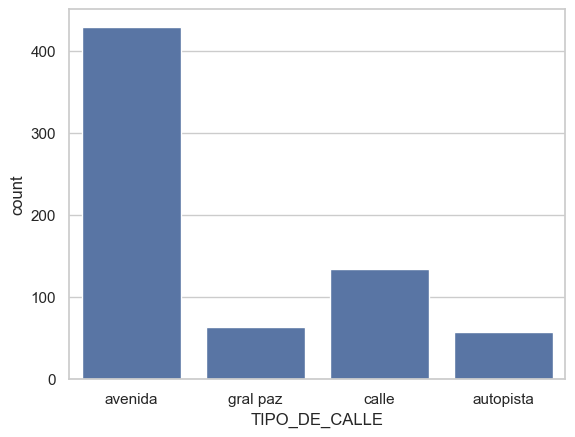

In [43]:
# Distribución Homicidios por Tipo de Calle
sns.countplot(x='TIPO_DE_CALLE', data=df_hec_hom)
plt.show()


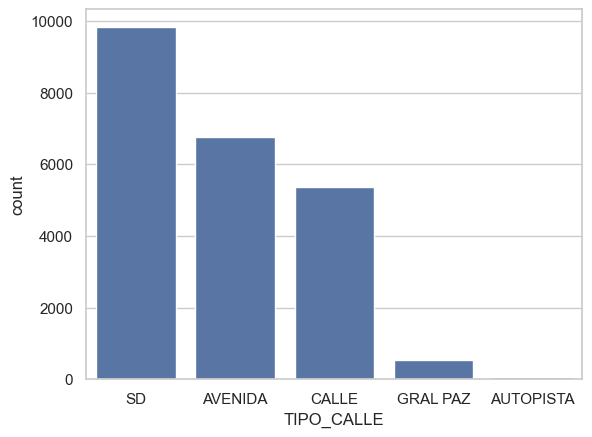

In [44]:
# Distribución Lesiones por Tipo de Calle
sns.countplot(x='TIPO_CALLE', data=df_hec_les)
plt.show()


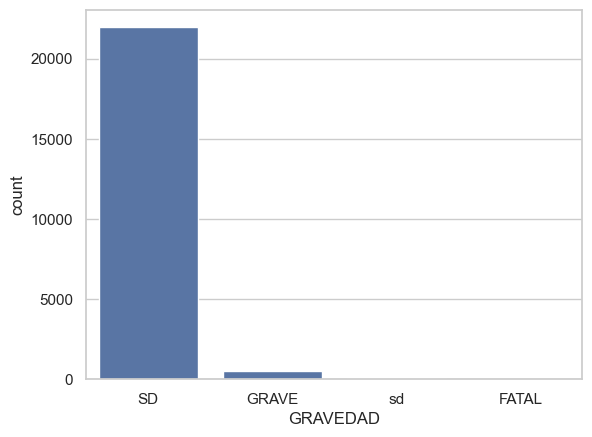

In [45]:
# Distribucion lesiones por Gravedad

sns.countplot(x='GRAVEDAD', data=df_hec_les)
plt.show()

### Analisis Bivariado

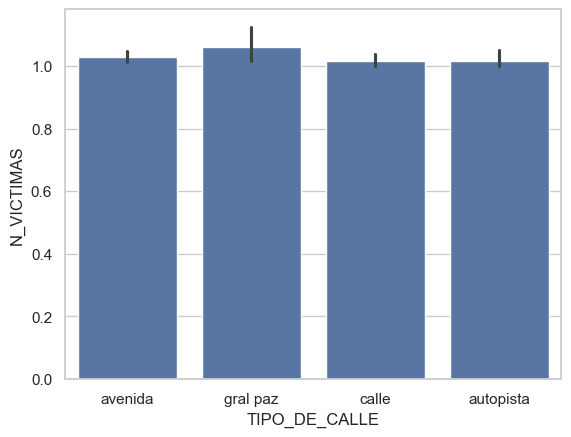

In [54]:
# Relación entre número de víctimas y tipo de calle
sns.barplot(x='TIPO_DE_CALLE', y='N_VICTIMAS', data=df_hec_hom)
plt.show()



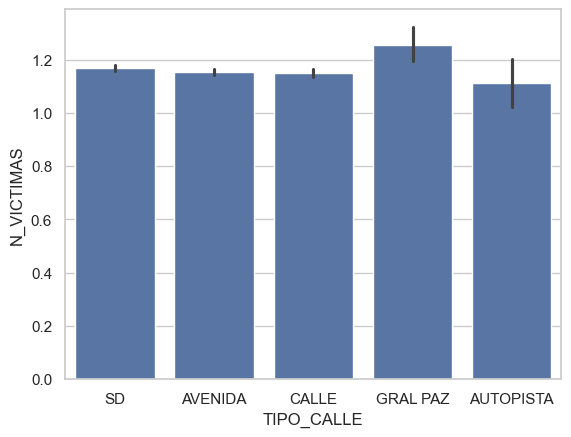

In [55]:
# Relación entre número de lesionados y tipo de calle
sns.barplot(x='TIPO_CALLE', y='N_VICTIMAS', data=df_hec_les)
plt.show()


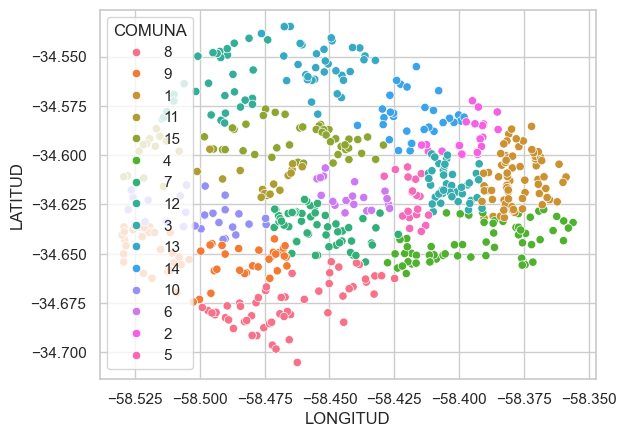

In [56]:

# Puedes utilizar gráficos de dispersión para relaciones entre variables numéricas
sns.scatterplot(x='LONGITUD', y='LATITUD', hue='COMUNA', data=df_hec_hom)
plt.show()

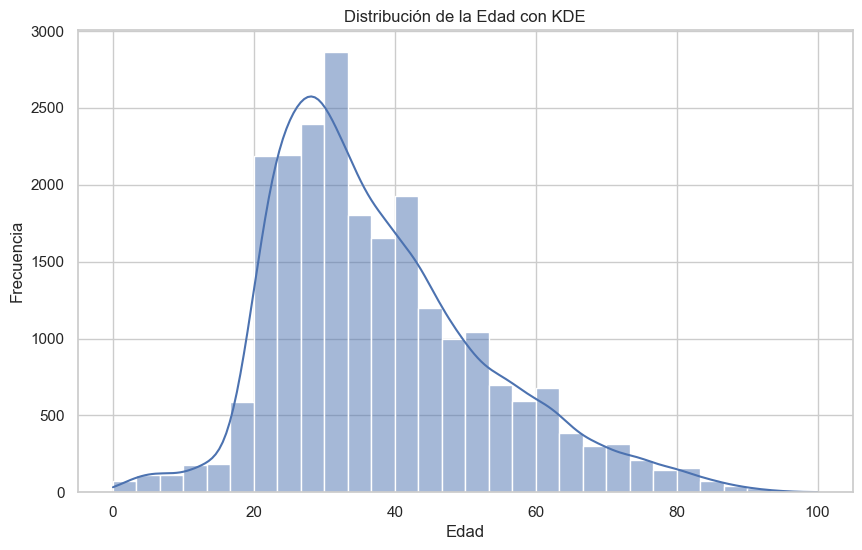

In [63]:
# Convertir la columna 'EDAD' a numérico, forzando errores a NaN
df_vic_les['EDAD'] = pd.to_numeric(df_vic_les['EDAD'], errors='coerce')

# Descartar las filas con NaN en 'EDAD' si quieres excluir 'SD'
df_vic_les = df_vic_les.dropna(subset=['EDAD'])

plt.figure(figsize=(10, 6))
sns.histplot(df_vic_les['EDAD'], kde=True, bins=30)
plt.title('Distribución de la Edad con KDE')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### Analisis multivariado

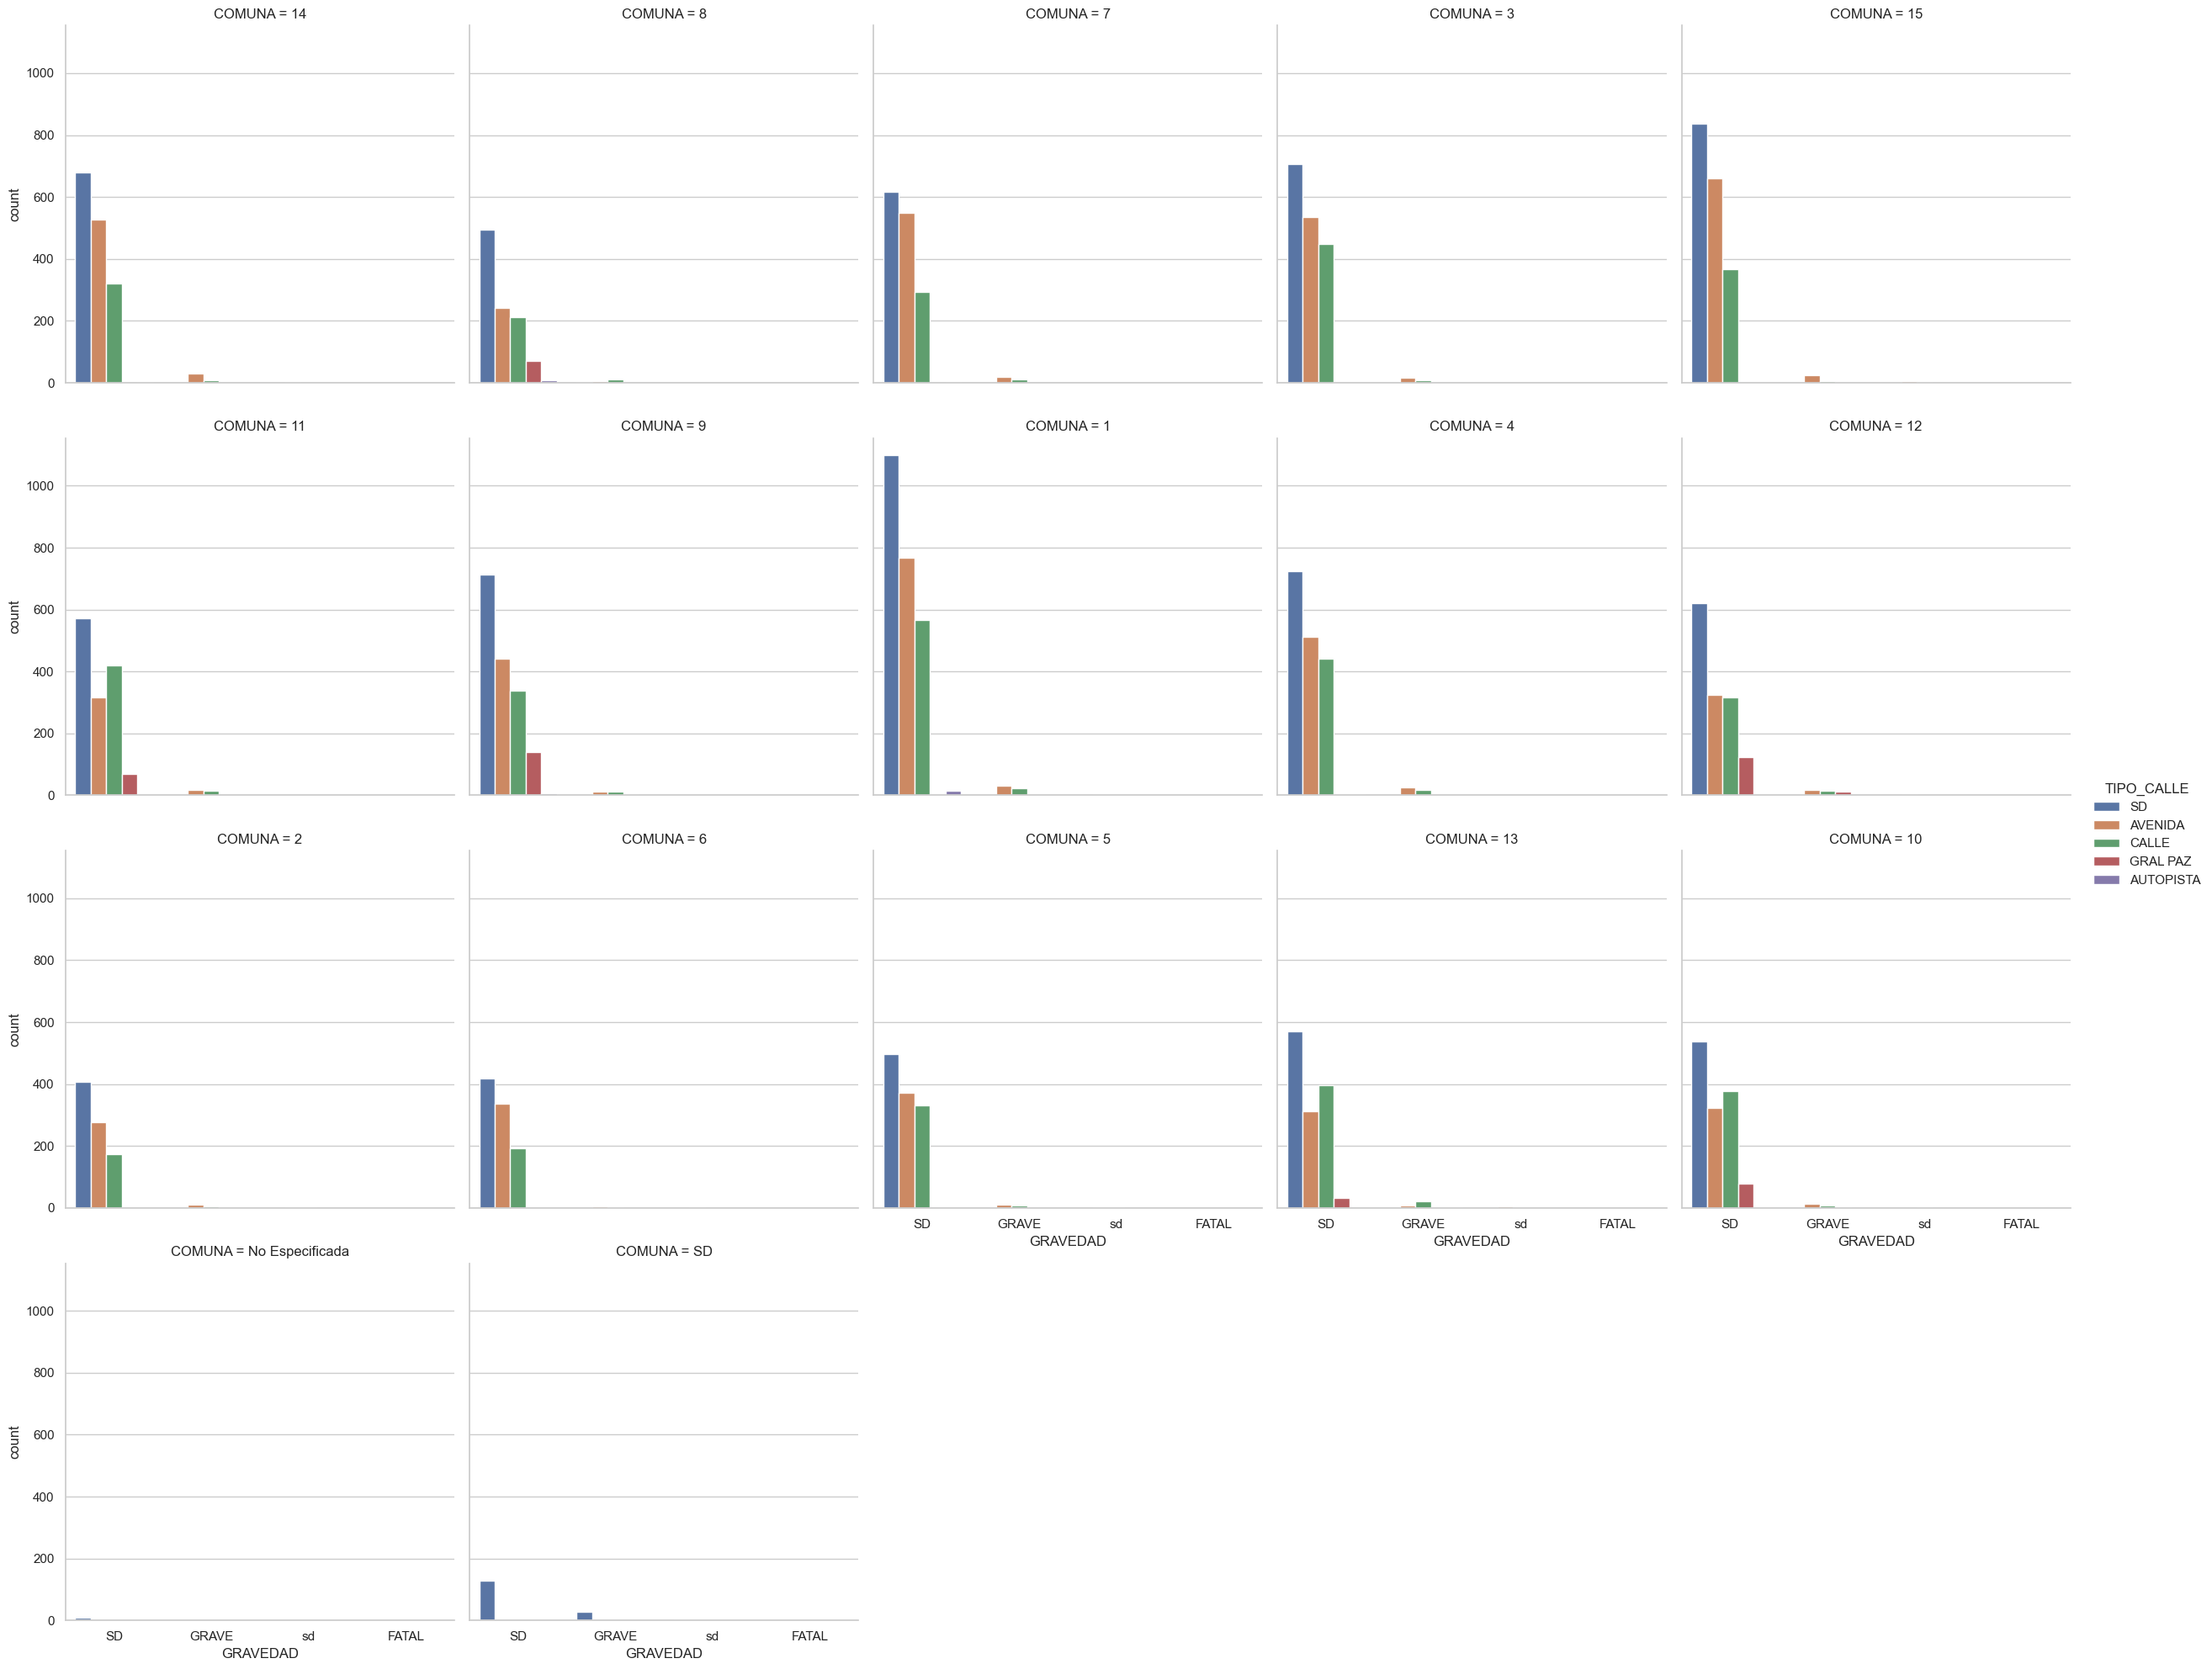

In [68]:
sns.catplot(x='GRAVEDAD',
            hue='TIPO_CALLE',
            col='COMUNA',
            data=df_hec_les,
            kind='count',
            col_wrap=5,
            sharex=True)
plt.show()

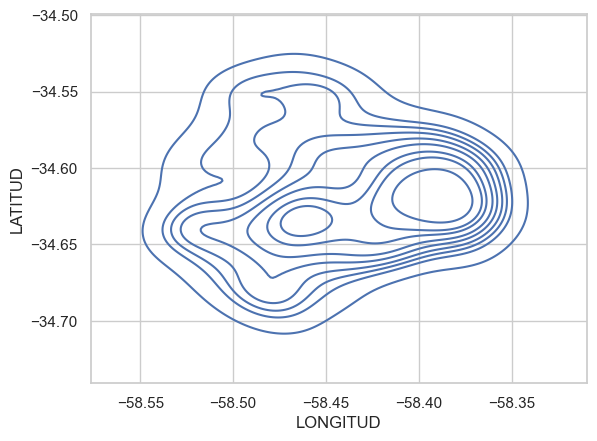

In [71]:
# Mapa de densidad CABA
sns.kdeplot(x=df_hec_hom['LONGITUD'], y=df_hec_hom['LATITUD'])
plt.show()

### Conclusiones Analisis Exploratorio de Datos

El EDA realizado ofrece una visión integral de la naturaleza y características de los incidentes viales en la ciudad, abarcando aspectos como la gravedad de los siniestros, distribución por tipo de calle y comuna, así como la frecuencia por edad de las víctimas involucradas.

- Principales Hallazgos:


Gravedad y Ubicación de los Siniestros:

La distribución de los siniestros muestra una concentración variable a través de las distintas comunas. Algunas comunas experimentan una mayor cantidad de incidentes de mayor gravedad, lo que podría correlacionarse con el flujo de tráfico y las características urbanísticas de cada zona.


Tipos de Calle:

Existe una prevalencia notable de siniestros en avenidas, seguida por calles generales y autopistas. Esto puede reflejar patrones de tráfico y posiblemente señalar áreas prioritarias para intervenciones de seguridad vial.
Edad de las Víctimas:

La distribución por edad de las víctimas muestra una tendencia hacia grupos más jóvenes. Esto subraya la importancia de políticas de prevención dirigidas a este segmento demográfico.


- Recomendaciones:

Focalizar Mejoras en Infraestructura:

La inversión en infraestructura de tráfico debería enfocarse en las comunas y tipos de calles con mayores tasas de siniestros, como la implementación de medidas calmantes de tráfico y mejor iluminación.
Campañas Educativas:

Campañas de seguridad vial dirigidas a conductores jóvenes podrían ser beneficiosas, dada la distribución de la edad de las víctimas.


- Análisis Profundizado por Comuna:

Se recomienda un análisis más detallado a nivel de comuna para identificar factores específicos que contribuyen a la alta incidencia en ciertas áreas.
Limitaciones del Análisis:

La presencia de valores nulos en columnas claves como 'DIRECCION' y datos marcados como 'SD' en las variables categóricas indican la necesidad de mejorar la recopilación y el procesamiento de datos para futuros análisis.
La distribución desigual de los datos entre las comunas puede afectar la generalización de los resultados y debería considerarse al interpretar los patrones observados.


- Pasos Futuros:

Se propone el desarrollo de modelos predictivos para identificar factores de riesgo y la implementación de sistemas de monitoreo en tiempo real para prevenir siniestros.
Fomentar la colaboración con autoridades locales para mejorar la calidad de los datos recopilados en futuros informes.

####